In [72]:
import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.lines import Line2D
from matplotlib.patches import Wedge
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [73]:
#import dataset for men
dfm = pd.read_csv("./mentalhealthworkforce.csv", index_col=None)
dfm = dfm.sort_values("Year").reset_index(drop=True)
# df2.to_csv("NCDRISK2019_data.csv", index=False)
dfm.head()


# #merging dataframes
# # Assuming dfm and dfw have indexes set to 'country' and 'ISO'
# merged_df = pd.merge(dfm, dfw, on=['Country', 'ISO'], how='inner')
# merged_df.head(200)

,Indicator,Regioncode,Region,Location type,Code,Country,Period type,Year,IsLatestYear,Dim1 type,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,Social workers working in mental health sector...,EUR,Europe,Country,BEL,Belgium,Year,2013,True,NaN,...,NaN,NaN,NaN,NaN,NaN,17.435,NaN,NaN,EN,2019-04-24T14:00:00.000Z
1,Psychiatrists working in mental health sector ...,EUR,Europe,Country,BEL,Belgium,Year,2013,True,NaN,...,NaN,NaN,NaN,NaN,NaN,20.057,NaN,NaN,EN,2019-04-24T14:00:00.000Z
2,Psychiatrists working in mental health sector ...,AFR,Africa,Country,MRT,Mauritania,Year,2013,True,NaN,...,NaN,NaN,NaN,NaN,NaN,0.072,NaN,NaN,EN,2019-04-24T14:00:00.000Z
3,Social workers working in mental health sector...,AMR,Americas,Country,HND,Honduras,Year,2014,True,NaN,...,NaN,NaN,NaN,NaN,NaN,0.234,NaN,NaN,EN,2019-04-24T14:00:00.000Z
4,Psychiatrists working in mental health sector ...,AMR,Americas,Country,HND,Honduras,Year,2014,True,NaN,...,NaN,NaN,NaN,NaN,NaN,0.658,NaN,NaN,EN,2019-04-24T14:00:00.000Z


In [74]:
#select values which has been flagged "Psychiatrists working in mental health sector (per 100,000)"
filtered_df = dfm[dfm['Indicator'] == "Psychiatrists working in mental health sector (per 100,000)"]
# Display the filtered result
filtered_df.head()

#only select few columns 
selected_columns_df = filtered_df[['Indicator', 'Regioncode', 'Region', 'Code', 'Country', 'Year', 'HF']]

# Display the selected columns
selected_columns_df.head()
selected_columns_df['Region'].value_counts()
selected_columns_df.shape

(146, 7)

In [75]:
df1 = pd.read_excel("./country_class.xlsx")
df1.columns

df2 = pd.read_csv("./physicians-per-1000-people.csv")
df2.columns

# Sort DataFrame by 'country'
df2_sorted = df2.sort_values(by=['Country', 'Year'])

# Group by 'country' and get the last row for each group
df_last = df2_sorted.groupby('Country').tail(1) 

df_last.head(220)
df1.shape

# # Save the unequal_HFues_df DataFrame to an Excel file
# df_last.to_csv('data3.csv', index=False)

(200, 4)

In [76]:
import pandas as pd
from functools import reduce

# List of dataframes to be merged
dfs = [selected_columns_df, df1, df_last]

# Merge all dataframes in the list
df = reduce(lambda left, right: pd.merge(left, right, on='Code', how='inner'), dfs)
df.columns


Index(['Indicator', 'Regioncode', 'Region', 'Code', 'Country_x', 'Year_x',
       'HF', 'Country_y', 'Income', 'pop', 'Country', 'Year_y', 'phy'],
      dtype='object')

In [77]:
codes_dataset1 = df1['Code']
codes_dataset2 = df_last['Code']

# Find the mismatched values in each dataset
codes_not_in_dataset2 = codes_dataset1[~codes_dataset1.isin(codes_dataset2)]
codes_not_in_dataset1 = codes_dataset2[~codes_dataset2.isin(codes_dataset1)]

# Output the mismatched values
print("Codes in dataset1 but not in dataset2:", codes_not_in_dataset2.values)



Codes in dataset1 but not in dataset2: ['COK' 'NIU' 'TWN' 'TKL']


In [78]:
# # Assuming 'df' is your DataFrame
# # Select rows where 'Code_x' is not equal to 'Code_y'
# unequal_values_df = df[df['Code_x'] != df['Code_y']] #this returns empty 

# # Display the result
# print(df[df['Code_x']=='NPL'])

# # Save the unequal_values_df DataFrame to an Excel file
# df.to_excel('unequal_values.xlsx', index=False)

In [79]:
#the physician figures are for per 1000 and phychiatrist figures are for per 100,000 therefore making this to same level

df['phy']=df['phy']*100

df.to_excel('unequal_values.xlsx', index=False)

df['phy2'] = df['phy']-df['HF']

df['phy2'].max()

833.64

In [80]:
#bringing data on people with mental disorders from GBD 2021
df1 = pd.read_csv("./IHME-GBD_2021_DATA-e343d311-1.csv")
df1.head(10)

#applying filters, selecting only preHFence figures 
# measure_name PreHFence
# sex_name Both
# age_name Age-standarized
# cause_name mental disorders
# metric_name percent

df_filtered1 = df1[(df1['measure_name'] == 'PreHFence') & 
                  (df1['sex_name'] == 'Both')]

df_filtered2 = df_filtered1[(df_filtered1['age_name'] == 'Age-standardized') & 
                  (df_filtered1['cause_name'] == 'Mental disorders')]

df_filtered3 = df_filtered2[(df_filtered2['metric_name'] == 'Percent')]
                                    
df_filtered3.head(10)

print(df_filtered3['location_name'].value_counts)

# df_filtered3.to_csv('data_for_map3.csv', index=False)
df_filtered4 = pd.read_csv('./data_for_map2.csv', encoding='latin1')

df_filtered4.head(10)

<bound method IndexOpsMixin.value_counts of Series([], Name: location_name, dtype: object)>


,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower,Country Name,Code
0,5,Prevalence,298,American Samoa,3,Both,27,Age-standardized,558,Mental disorders,2,Percent,2021,0.117679,0.135664,0.103521,American Samoa,ASM
1,5,Prevalence,105,Antigua and Barbuda,3,Both,27,Age-standardized,558,Mental disorders,2,Percent,2021,0.154988,0.174399,0.135936,Antigua and Barbuda,ATG
2,5,Prevalence,141,Arab Republic of Egypt,3,Both,27,Age-standardized,558,Mental disorders,2,Percent,2021,0.160745,0.183689,0.141533,Arab Republic of Egypt,EGY
3,5,Prevalence,97,Argentine Republic,3,Both,27,Age-standardized,558,Mental disorders,2,Percent,2021,0.155424,0.177289,0.136757,Argentine Republic,ARG
4,5,Prevalence,71,Australia,3,Both,27,Age-standardized,558,Mental disorders,2,Percent,2021,0.204801,0.227811,0.184667,Australia,AUS
5,5,Prevalence,107,Barbados,3,Both,27,Age-standardized,558,Mental disorders,2,Percent,2021,0.159914,0.183265,0.142125,Barbados,BRB
6,5,Prevalence,108,Belize,3,Both,27,Age-standardized,558,Mental disorders,2,Percent,2021,0.156107,0.175775,0.137184,Belize,BLZ
7,5,Prevalence,305,Bermuda,3,Both,27,Age-standardized,558,Mental disorders,2,Percent,2021,0.160519,0.181486,0.142700,Bermuda,BMU
8,5,Prevalence,133,Bolivarian Republic of Venezuela,3,Both,27,Age-standardized,558,Mental disorders,2,Percent,2021,0.145508,0.165065,0.128303,Bolivarian Republic of Venezuela,VEN
9,5,Prevalence,44,Bosnia and Herzegovina,3,Both,27,Age-standardized,558,Mental disorders,2,Percent,2021,0.131930,0.148090,0.116831,Bosnia and Herzegovina,BIH


In [81]:
# Merging DataFrames on 'code'
merged_df = pd.merge(df, df_filtered4, on='Code', how='inner')

merged_df.columns

Index(['Indicator', 'Regioncode', 'Region', 'Code', 'Country_x', 'Year_x',
       'HF', 'Country_y', 'Income', 'pop', 'Country', 'Year_y', 'phy', 'phy2',
       'measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id',
       'sex_name', 'age_id', 'age_name', 'cause_id', 'cause_name', 'metric_id',
       'metric_name', 'year', 'val', 'upper', 'lower', 'Country Name'],
      dtype='object')

In [84]:
#redefine merged_df as df
df=merged_df

df.head(10)

#for simplicity, take roughtly 20% of population have at least one mental health disorders

df['pop_mh']=df['pop']*df['val']

df.head(3)

#mental health demand
df['pop_mh_visit1']= df['pop_mh']*12
df['pop_mh_visit2']= df['pop_mh']*6
df['pop_mh_visit3']= df['pop_mh']*3

#mental health supply - workforce availability 

#Instance 1. Only psychiatrist provide mental health care 
#estimation scenario 1: one psychiatrist provide 20 consultation in a day
#one psychiatrist works 200 days a in year
df['phy_s1']=(df['HF']*df['pop']/100000)*200*20

# estimation scenario 2: one psychiatrist provides 10 consulation in a day
#one psychiatrist works 200 days a in year
df['phy_s2']=(df['phy']*df['pop']/100000)*200*10

#Instance 2. Only physicians are provide mental health care (*psychiatrist are counted are physicians here)
#estimation scenario 1: one psychiatrist provide 20 consultation in a day
#one psychiatrist works 200 days a in year
df['phy_s1_i1']=(df['phy']*df['pop']/100000)*200*20*0.1   # they can only give 10% of time in mental health care

# estimation scenario 2: one psychiatrist provides 10 consulation in a day
#one psychiatrist works 200 days a in year
df['phy_s2_i2']=(df['phy']*df['pop']/100000)*200*10*0.1  # they can only give 10% of time in mental health care


#gaps in mental health care
#base scenario 12 vitis a year
df['gaps_hf_base_s1']=df['pop_mh_visit1'] - df['phy_s1'] #20 patients a day 

df['gaps_hf_base_s2']=df['pop_mh_visit1'] - df['phy_s2'] #10 patients a day 

#when physcians are involved as well
df['gaps_hf_base_s1_i1'] = df['pop_mh_visit1'] - df['phy_s1_i1'] #20 patients a day 

df['gaps_hf_base_s2_i2'] = df['pop_mh_visit1'] - df['phy_s2_i2'] #10 patients a day 


#sensitivity analysis
# S1
df['gaps_hf_6_s1'] = df['pop_mh_visit2'] - df['phy_s1'] #20 patients a day 
df['gaps_hf_6_s2'] = df['pop_mh_visit2'] - df['phy_s2'] #10 patients a day 

# S2
df['gaps_hf_3_s1'] = df['pop_mh_visit3'] - df['phy_s1'] #20 patients a day 
df['gaps_hf_3_s2'] = df['pop_mh_visit3'] - df['phy_s2'] #10 patients a day 

# S3 - physicians added
df['gaps_hf_6_s1_i1'] = df['pop_mh_visit2'] - df['phy_s1_i1'] #20 patients a day 
df['gaps_hf_6_s2_i2'] = df['pop_mh_visit2'] - df['phy_s2_i2'] #10 patients a day 

# S4 - physicians added
df['gaps_hf_3_s1_i1'] = df['pop_mh_visit3'] - df['phy_s1_i1'] #20 patients a day 
df['gaps_hf_3_s2_i2'] = df['pop_mh_visit3'] - df['phy_s2_i2'] #10 patients a day 


In [85]:
# Base scenario: one psychiatrist provides 20 consultations per day and works 200 days a year
df['phy_s1'] = (df['HF'] * df['pop'] / 100000) * 200 * 20

# Loop to vary 'i' from 1 to 12 and create columns for each 'i'
for i in range(1, 13):
    # Create a new column 'pop_mh_visit_i'
    df[f'pop_mh_visit_{i}'] = df['pop_mh'] * i
    
    # Calculate gaps in mental health care
    df[f'gaps_hf_base_s_{i}'] = df[f'pop_mh_visit_{i}'] - df['phy_s1']

    df[f'gaps_percent_{i}'] = (df[f'pop_mh_visit_{i}'] - df['phy_s1'])/ df[f'pop_mh_visit_{i}']

# View the modified DataFrame
print(df)

df.columns


                                             Indicator Regioncode  \
0    Psychiatrists working in mental health sector ...        EUR   
1    Psychiatrists working in mental health sector ...        AFR   
2    Psychiatrists working in mental health sector ...        AMR   
3    Psychiatrists working in mental health sector ...        EUR   
4    Psychiatrists working in mental health sector ...        EUR   
..                                                 ...        ...   
139  Psychiatrists working in mental health sector ...        EMR   
140  Psychiatrists working in mental health sector ...        AFR   
141  Psychiatrists working in mental health sector ...       SEAR   
142  Psychiatrists working in mental health sector ...        EUR   
143  Psychiatrists working in mental health sector ...        EMR   

                    Region Code                   Country_x  Year_x      HF  \
0                   Europe  BEL                     Belgium    2013  20.060   
1            

Index(['Indicator', 'Regioncode', 'Region', 'Code', 'Country_x', 'Year_x',
       'HF', 'Country_y', 'Income', 'pop', 'Country', 'Year_y', 'phy', 'phy2',
       'measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id',
       'sex_name', 'age_id', 'age_name', 'cause_id', 'cause_name', 'metric_id',
       'metric_name', 'year', 'val', 'upper', 'lower', 'Country Name',
       'pop_mh', 'pop_mh_visit1', 'pop_mh_visit2', 'pop_mh_visit3', 'phy_s1',
       'phy_s2', 'phy_s1_i1', 'phy_s2_i2', 'gaps_hf_base_s1',
       'gaps_hf_base_s2', 'gaps_hf_base_s1_i1', 'gaps_hf_base_s2_i2',
       'gaps_hf_6_s1', 'gaps_hf_6_s2', 'gaps_hf_3_s1', 'gaps_hf_3_s2',
       'gaps_hf_6_s1_i1', 'gaps_hf_6_s2_i2', 'gaps_hf_3_s1_i1',
       'gaps_hf_3_s2_i2', 'pop_mh_visit_1', 'gaps_hf_base_s_1',
       'gaps_percent_1', 'pop_mh_visit_2', 'gaps_hf_base_s_2',
       'gaps_percent_2', 'pop_mh_visit_3', 'gaps_hf_base_s_3',
       'gaps_percent_3', 'pop_mh_visit_4', 'gaps_hf_base_s_4',
       'gaps_perce

In [99]:
print(df['val'].min())
print(df['val'].max())

# Assuming df is your DataFrame and 'Income' and 'val' are the relevant columns
mean_by_income = df.groupby('Income')['val'].mean()

# Print the result
print(mean_by_income)

# Assuming df is your DataFrame and 'Income' and 'val' are the relevant columns
phy_by_income = df.groupby('Income')['phy'].mean()

# Print the result
print(phy_by_income)

# Assuming df is your DataFrame and 'Income' and 'val' are the relevant columns
HF_by_income = df.groupby('Income')['HF'].mean()

# Print the result
print(HF_by_income)

0.111362924
0.207146582
Income
High income            0.158777
Low income             0.140786
Lower middle income    0.136806
Upper middle income    0.145089
Name: val, dtype: float64
Income
High income            355.835000
Low income              17.836842
Lower middle income     78.720588
Upper middle income    218.058824
Name: phy, dtype: float64
Income
High income            12.686000
Low income              0.077684
Lower middle income     0.825941
Upper middle income     3.444314
Name: HF, dtype: float64


In [63]:
df.columns

df.to_csv('data_for_map.csv', index=False)
df = pd.read_csv("./data_for_map.csv")

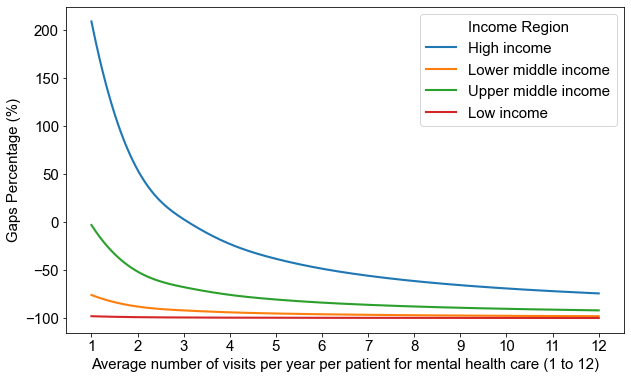

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

# Set font to Calibri
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 15

# Assuming df contains columns 'Income' and 'gaps_percent_1' to 'gaps_percent_12'
# and each region appears multiple times in the DataFrame

# Set x values (corresponding to 1 to 12 in the 'gaps_percent' columns)
x_values = np.array(range(1, 13))

# Get unique income regions
income_regions = df['Income'].unique()

# Create a line plot for each income region
plt.figure(figsize=(10, 6))

for region in income_regions:
    # Filter the DataFrame for the current region
    df_region = df[df['Income'] == region]
    
    # Calculate the mean gaps for each percentage column across the region (multiply by 100 for percentage)
    y_values = np.array([df_region[f'gaps_percent_{i}'].mean() * -100 for i in x_values])
    
    # Create a smooth curve using interpolation
    x_smooth = np.linspace(x_values.min(), x_values.max(), 500)
    spline = make_interp_spline(x_values, y_values, k=3)  # k=3 for cubic spline
    y_smooth = spline(x_smooth)
    
    # Plot the smooth line for this region
    plt.plot(x_smooth, y_smooth, label=region, linewidth=2.1)  # Default is 2, increased by 5%

# Add labels and title
plt.xlabel('Average number of visits per year per patient for mental health care (1 to 12)')
plt.ylabel('Gaps Percentage (%)')
plt.title('')
plt.legend(title='Income Region')

# Remove grid lines
plt.grid(False)

# Set x-axis ticks to show values 1 through 6 with increment of 1
plt.xticks(ticks=range(1, 13), labels=range(1, 13))

# Show the plot
plt.savefig("./gaps_countries.png", dpi=300, bbox_inches='tight')
plt.show()


In [49]:
#summarise this as a table "Total Gap in Visit (Millions/y) by Average Number of Visits per Year (Base Case Scenario of Physician Volume)"
import pandas as pd
from docx import Document

import pandas as pd

# Assuming df contains columns 'Income' and 'gaps_hf_base_s_1' to 'gaps_hf_base_s_12'

# Create a list to hold the data for the table
table_data = []

# Get unique income regions
income_regions = df['Income'].unique()

# Create the table data
for region in income_regions:
    # Filter the DataFrame for the current region
    df_region = df[df['Income'] == region]
    
    # Collect gaps_hf_base_s_i values from 1 to 12
    row = [region] + [-round(df_region[f'gaps_hf_base_s_{i}'].mean() / 1_000_000, 1) for i in range(1, 13)]
    table_data.append(row)

# Create a DataFrame for the table data
columns = ['Income Region'] + [f'gaps_hf_base_s_{i}' for i in range(1, 13)]
table_df = pd.DataFrame(table_data, columns=columns)

# Write the DataFrame to an Excel file
table_df.to_excel('Gaps_Mental_Health_Care.xlsx', index=False)

In [71]:
frequency = df['Income'].value_counts()
percentage = (df['Income'].value_counts(normalize=True) * 100).round(1)
summary_df = pd.DataFrame({
    'Frequency': frequency,
    'Percentage (%)': percentage
})
summary_df = summary_df.reset_index()
summary_df.columns = ['Income', 'Frequency', 'Percentage (%)']
print(summary_df)




                Income  Frequency  Percentage (%)
0  Upper middle income         51            35.4
1          High income         40            27.8
2  Lower middle income         34            23.6
3           Low income         19            13.2


In [22]:
df.columns

HF = df['HF']
t1 = HF.quantile(0.25)
t2 = HF.quantile(0.50)  # Median
t3 = HF.quantile(0.75)
t4 = HF.quantile(0.90)
t5 = HF.max()

# 985594.1676 4076002.788 14268291.94875 35761464.534600034 910094182.4
# Define the cut-off values

Q1 = round(t1,1)
Q2  = round(t2)
Q3 = round(t3)
Q4  = round(t4)
Q5  = round(t5)

print(Q1, Q2, Q3, Q4, Q5)

# Function to categorize values based on cut-off points
def categorize_gaps(value):
    if value <= Q1:
        return 1
    elif Q1 < value <= Q2:
            return 2
    elif Q2 < value <= Q3:
        return 3
    elif Q3 < value <= Q4:
        return 4
    elif Q4 < value <= Q5:
        return 5
    else:
        return 6

# Apply the function to the 'gaps_hf_base_s1' column
print(Q1,)
df['HF_cat4'] = df['HF'].apply(categorize_gaps)
df.head(2)

0.2 1 7 14 48
0.2


,Indicator,Regioncode,Region,Code,Country_x,Year_x,HF,Country_y,Income,pop,...,gaps_hf_base_s2_i2,gaps_hf_6_s1,gaps_hf_6_s2,gaps_hf_3_s1,gaps_hf_3_s2,gaps_hf_6_s1_i1,gaps_hf_6_s2_i2,gaps_hf_3_s1_i1,gaps_hf_3_s2_i2,HF_cat4
0,Psychiatrists working in mental health sector ...,EUR,Europe,BEL,Belgium,2013,20.060,Belgium,High income,8300000,...,6.554373e+06,1.810576e+06,5.140536e+06,-2.424672e+06,9.052882e+05,-1.230274e+07,-1.916124e+06,-1.653799e+07,-6.151372e+06,5
1,Psychiatrists working in mental health sector ...,AFR,Africa,MRT,Mauritania,2013,0.072,Mauritania,Lower middle income,3100000,...,4.150057e+06,2.125621e+06,2.130085e+06,1.058346e+06,1.062810e+06,1.896469e+06,2.015509e+06,8.291943e+05,9.482343e+05,1


0.2 1 7 14 48
count    144.000000
mean       2.597222
std        1.291822
min        1.000000
25%        1.750000
50%        2.000000
75%        3.250000
max        5.000000
Name: HF_cat4, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_21532\2694005436.py:105: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  missing_data.plot(ax=ax, color='#66b3cc', hatch='///')


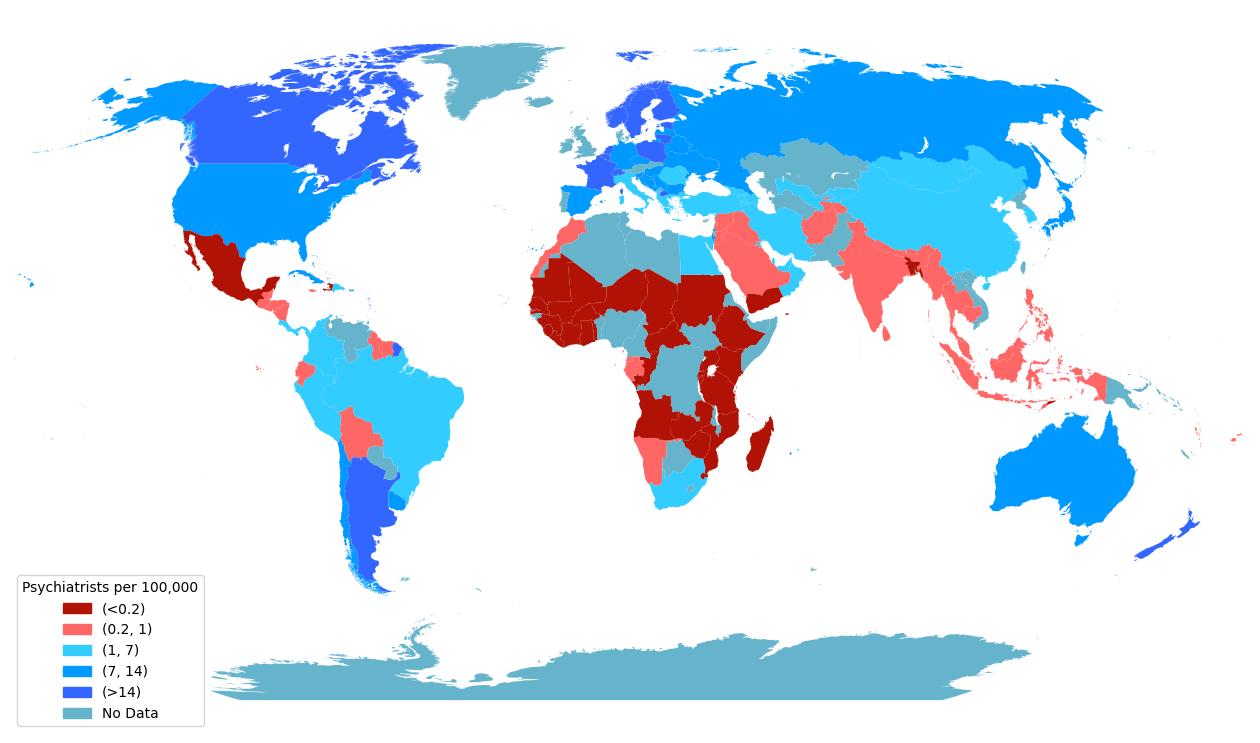

In [4]:
#psychiatrist per 100,000 population

import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from slugify import slugify
import matplotlib.patches as mpatches

# Define parameters
figsize = (16, 10)
year = 'HF_cat4'  # Use 'gaps_cat4_hf_6' as the variable name
title = ''
imgfile = 'img5/{}.png'.format(slugify(title))
description = ''''''.strip()

# Load GeoDataFrame and data
gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
df = pd.read_csv("./data_for_map.csv")

# Assuming df is already renamed as:
df = df.rename(columns={"Country": "Country", "Code": "Country Code"})

HF = df['HF']
t1 = HF.quantile(0.25)
t2 = HF.quantile(0.50)  # Median
t3 = HF.quantile(0.75)
t4 = HF.quantile(0.90)
t5 = HF.max()

# 985594.1676 4076002.788 14268291.94875 35761464.534600034 910094182.4
# Define the cut-off values

Q1 = round(t1,1)
Q2  = round(t2)
Q3 = round(t3)
Q4  = round(t4)
Q5  = round(t5)

print(Q1, Q2, Q3, Q4, Q5)

# Function to categorize values based on cut-off points
def categorize_gaps(value):
    if value <= t1:
        return 1
    elif t1 < value <= t2:
            return 2
    elif t2 < value <= t3:
        return 3
    elif t3 < value <= t4:
        return 4
    elif t4 < value <= t5:
        return 5
    else:
        return 6

# Apply the function to the 'gaps_hf_base_s1' column
df['HF_cat4'] = df['HF'].apply(categorize_gaps)
df.head(10)

print(df['HF_cat4'].describe(include='object'))

# Perform a left join to include all rows from gdf (even if no match is found in df)
merged = gdf.merge(df, how='left', left_on='ADM0_A3', right_on='Country Code')

# Define the custom color categories for 'gaps_cat4_hf_6'
def assign_color(row):
    if row[year] == 1:
        return f'(<{round(Q1,1)})'
    elif row[year] == 2:
        return f'({round(Q1,1)}, {round(Q2)})'
    elif row[year] == 3:
        return f'({round(Q2)}, {round(Q3)})'
    elif row[year] == 4:
        return f'({round(Q3)}, {round(Q4)})'
    elif row[year] == 5:
        return f'(>{round(Q4)})'
    else:
        return 'No Data'

# Create a new column 'category' with the assigned colors
merged['category'] = merged.apply(assign_color, axis=1)

# Define a color map for the categories
colors = {
    f'(<{round(Q1,1)})': '#b01305',  # Blue
    f'({round(Q1,1)}, {round(Q2)})': '#ff6666',  # Light blue
    f'({round(Q2)}, {round(Q3)})': '#33ccff',  # Medium red
    f'({round(Q3)}, {round(Q4)})': '#0099ff',  # Darker red
    f'(>{round(Q4)})': '#3366ff',  # Darkest red
    'No Data': '#66b3cc'  # Black for missing data
}

# Map the colors to the merged GeoDataFrame
merged['color'] = merged['category'].map(colors)

# Plot
fig, ax = plt.subplots(figsize=figsize)

# Plot the data using the color mapping
merged.plot(ax=ax, color=merged['color'], legend=False)

# Highlight missing data with a hatch pattern
missing_data = merged[merged['category'] == 'Missing data']
missing_data.plot(ax=ax, color='#66b3cc', hatch='///')

# Set plot title and annotations
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

# Customize plot appearance
ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])

# Create custom legend using the categories and their corresponding colors
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_patches, title="Psychiatrists per 100,000", loc="lower left")

# Create the directory if it does not exist
os.makedirs(os.path.dirname(imgfile), exist_ok=True)

# Save the figure to a file
plt.savefig(imgfile, dpi=600, bbox_inches='tight')

# Show the figure
plt.show()


43.2 164 300 428 843
count    144.000000
mean       2.604167
std        1.291277
min        1.000000
25%        1.750000
50%        2.500000
75%        3.250000
max        5.000000
Name: phy_cat4, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_21532\1606968720.py:105: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  missing_data.plot(ax=ax, color='#66b3cc', hatch='///')


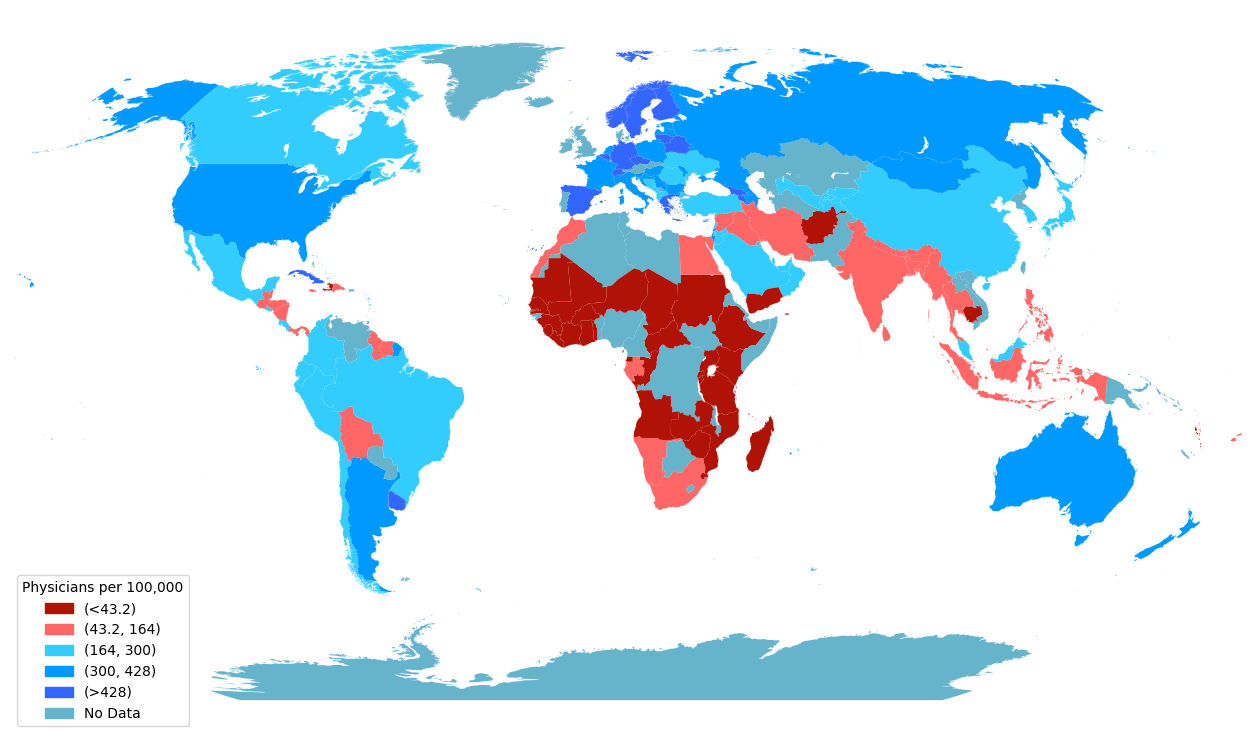

In [5]:
#physicians per 100,000 population

import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from slugify import slugify
import matplotlib.patches as mpatches

# Define parameters
figsize = (16, 10)
year = 'phy_cat4'  # Use 'gaps_cat4_hf_6' as the variable name
title = ''
imgfile = 'img6/{}.png'.format(slugify(title))
description = ''''''.strip()

# Load GeoDataFrame and data
gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
df = pd.read_csv("./data_for_map.csv")

# Assuming df is already renamed as:
df = df.rename(columns={"Country": "Country", "Code": "Country Code"})

phy = df['phy']
t1 = phy.quantile(0.25)
t2 = phy.quantile(0.50)  # Median
t3 = phy.quantile(0.75)
t4 = phy.quantile(0.90)
t5 = phy.max()

# 985594.1676 4076002.788 14268291.94875 35761464.534600034 910094182.4
# Define the cut-off values

Q1 = round(t1,1)
Q2  = round(t2)
Q3 = round(t3)
Q4  = round(t4)
Q5  = round(t5)

print(Q1, Q2, Q3, Q4, Q5)

# Function to categorize values based on cut-off points
def categorize_gaps(value):
    if value <= t1:
        return 1
    elif t1 < value <= t2:
            return 2
    elif t2 < value <= t3:
        return 3
    elif t3 < value <= t4:
        return 4
    elif t4 < value <= t5:
        return 5
    else:
        return 6

# Apply the function to the 'gaps_hf_base_s1' column
df['phy_cat4'] = df['phy'].apply(categorize_gaps)
df.head(10)

print(df['phy_cat4'].describe(include='object'))

# Perform a left join to include all rows from gdf (even if no match is found in df)
merged = gdf.merge(df, how='left', left_on='ADM0_A3', right_on='Country Code')

# Define the custom color categories for 'gaps_cat4_hf_6'
def assign_color(row):
    if row[year] == 1:
        return f'(<{round(Q1,1)})'
    elif row[year] == 2:
        return f'({round(Q1,1)}, {round(Q2)})'
    elif row[year] == 3:
        return f'({round(Q2)}, {round(Q3)})'
    elif row[year] == 4:
        return f'({round(Q3)}, {round(Q4)})'
    elif row[year] == 5:
        return f'(>{round(Q4)})'
    else:
        return 'No Data'

# Create a new column 'category' with the assigned colors
merged['category'] = merged.apply(assign_color, axis=1)

# Define a color map for the categories
colors = {
    f'(<{round(Q1,1)})': '#b01305',  # Blue
    f'({round(Q1,1)}, {round(Q2)})': '#ff6666',  # Light blue
    f'({round(Q2)}, {round(Q3)})': '#33ccff',  # Medium red
    f'({round(Q3)}, {round(Q4)})': '#0099ff',  # Darker red
    f'(>{round(Q4)})': '#3366ff',  # Darkest red
    'No Data': '#66b3cc'  # Black for missing data
}

# Map the colors to the merged GeoDataFrame
merged['color'] = merged['category'].map(colors)

# Plot
fig, ax = plt.subplots(figsize=figsize)

# Plot the data using the color mapping
merged.plot(ax=ax, color=merged['color'], legend=False)

# Highlight missing data with a hatch pattern
missing_data = merged[merged['category'] == 'Missing data']
missing_data.plot(ax=ax, color='#66b3cc', hatch='///')

# Set plot title and annotations
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

# Customize plot appearance
ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])

# Create custom legend using the categories and their corresponding colors
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_patches, title="Physicians per 100,000", loc="lower left")

# Create the directory if it does not exist
os.makedirs(os.path.dirname(imgfile), exist_ok=True)

# Save the figure to a file
plt.savefig(imgfile, dpi=600, bbox_inches='tight')

# Show the figure
plt.show()
